In [1]:
import numpy as np
from PIL import Image
from PIL import ImageOps
import matplotlib.pyplot as plt
import geomstats.geometry.poincare_ball as PoincareBall
import geomstats.geometry.hyperboloid as Hyperboloid
import torch
import networkx as nx

import math

from copy import deepcopy

INFO: Using numpy backend


In [3]:
np.random.seed(0)

full_img_size = 128
patch_size = 64

xs = torch.linspace(-20, 20, steps=full_img_size)
ys = torch.linspace(-20, 20, steps=full_img_size)
X, Y = torch.meshgrid(xs, ys, indexing='xy')

num_gaussians = 50

mean_init_range=(-20.0, 20.0)
std_init_range=(0.5, 2.0)
        
gauss_means = []
gauss_stds = []
for _ in range(num_gaussians):
    gauss_means.append(
        list(np.random.uniform(low=min(mean_init_range), high=max(mean_init_range), size=(2,)))
    )

    gauss_stds.append(
        list(np.random.uniform(low=min(std_init_range), high=max(std_init_range), size=(2,)))
    )
    
def bigauss(x, y, mean, std):
    return torch.exp(-( (x - mean[0])**2/(2 * std[0]**2) + (y - mean[1])**2/(2 * std[1]**2) ))


def get_center(x):    
    center = (x.shape[0]//2, x.shape[1]//2)

    return x[math.ceil(center[0] - patch_size/2) : math.ceil(center[0] + patch_size/2), math.ceil(center[1] - patch_size/2) : math.ceil(center[1] + patch_size/2)]


def construct_image(X, Y, gauss_means, gauss_stds):
    patch = torch.zeros(full_img_size, full_img_size)

    for mean, std in zip(gauss_means, gauss_stds):
        patch += bigauss(X, Y, mean, std)

    return get_center(patch)


def move_gauss(gauss_means, shift_x, shift_y):
    means = deepcopy(gauss_means)
    
    for i in range(len(means)):
        means[i][0] += shift_x
        means[i][1] += shift_y
        
    return means

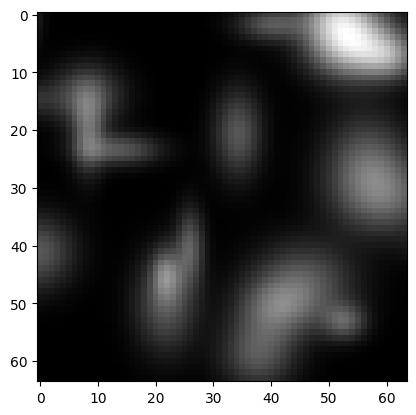

In [4]:
plt.imshow(construct_image(X, Y, gauss_means, gauss_stds).numpy(), cmap='gray')

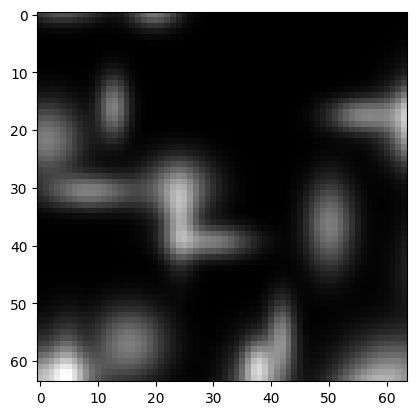

In [5]:
plt.imshow(construct_image(X, Y, move_gauss(gauss_means, 5, 5), gauss_stds).numpy(), cmap='gray')

In [6]:
img1 = construct_image(X, Y, gauss_means, gauss_stds).numpy()
img2 = construct_image(X, Y, move_gauss(gauss_means, 5, 5), gauss_stds).numpy()

In [7]:
# Map the image onto a 2D plane
width, height = img1.shape[0], img1.shape[1]

x, y = np.meshgrid(np.linspace(-10, 10, width), np.linspace(-10, 10, height))
plane_coords = np.stack([x, y], axis=-1).reshape(-1, 2)

# Concatenate the color values with the plane coordinates
# colors = img_array.reshape(-1, 1)

# Embed the plane onto a Poincare disk
hyperboloid = Hyperboloid.Hyperboloid(dim=2)
hyperboloid_coords = hyperboloid.intrinsic_to_extrinsic_coords(plane_coords)
ball_coords = hyperboloid._extrinsic_to_ball_coordinates(hyperboloid_coords)

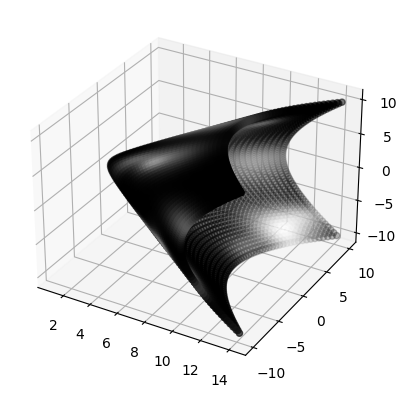

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(*hyperboloid_coords.T, c=img1.flatten(), cmap='gray')

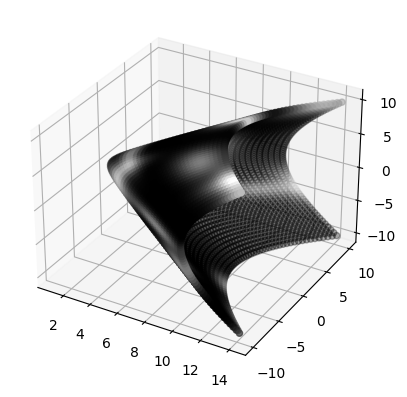

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(*hyperboloid_coords.T, c=img2.flatten(), cmap='gray')

In [10]:
t = hyperboloid_coords[:, 0]
x1 = hyperboloid_coords[:, 1]
x2 = hyperboloid_coords[:, 2]

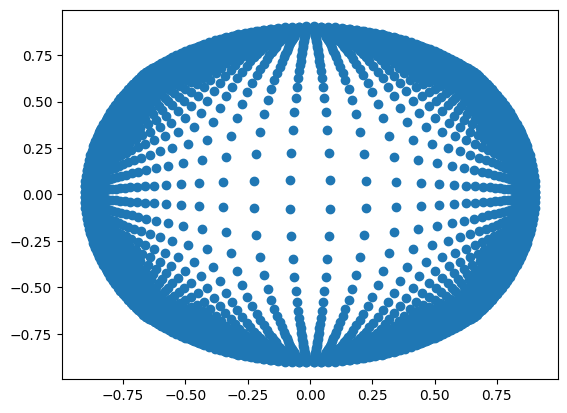

In [11]:
plt.scatter(x1/(1 + t), x2/(1 + t))

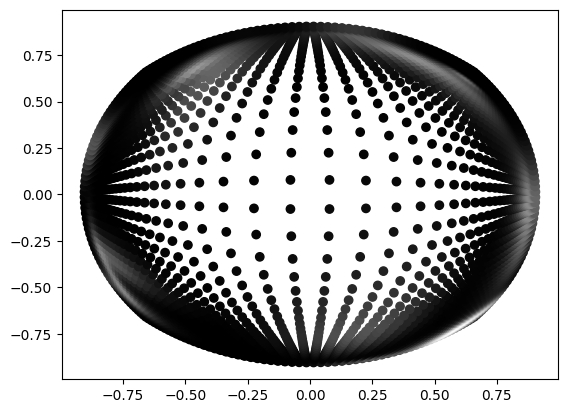

In [12]:
# theta = np.linspace(0, 2*np.pi, num=100)

# xs = 1*np.cos(theta)
# ys = 1*np.sin(theta)

plt.scatter(*ball_coords.T, c=img1.flatten(), cmap='gray')
# plt.scatter(xs, ys)

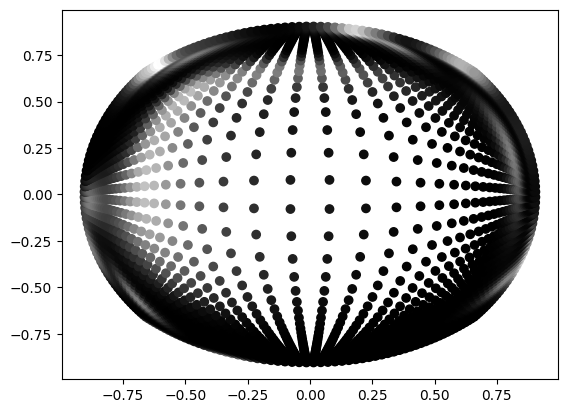

In [13]:
# theta = np.linspace(0, 2*np.pi, num=100)

# xs = 0.4 * np.cos(theta)
# ys = 0.4 * np.sin(theta)

plt.scatter(*ball_coords.T, c=img2.flatten(), cmap='gray')
# plt.scatter(xs, ys)

In [33]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


def poincare_radial_layout(tree, root):
    pos = {root: np.array([0, 0])}
    
    # level order BFS
    levels = list(nx.bfs_layers(tree, sources=root))[:-1]
    
    for level, nodes in enumerate(levels):
        print(level, nodes)
        
        # new radius given tree level
        radius = np.tanh((level + 1) / (2 * np.arcsinh(np.sqrt(2))))
        
        
        for i, node in enumerate(nodes):
            
                        
            parent = list(nx.predecessor(tree, node).keys())[1]
            
#             parent_angle = np.angle(pos[parent][0] + 1j * pos[parent][1])
            
            # angle for node is based on 
            delta_angle = 2 * np.pi / len(list(tree.neighbors(parent)))
    
            pos[parent]
            
            angle = parent_angle + (i+1) * delta_angle

            
            
            x = radius * np.cos(angle)
            y = radius * np.sin(angle)

            pos[node] = np.array([x, y])
        
        print('\n\n')

    return pos

# Create a sample regular tree
tree = nx.DiGraph()
tree.add_nodes_from(list(range(7)))
tree.add_edges_from([(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6)])
nx.draw(tree)

root = 0

# Compute positions on Poincare disk
pos = poincare_radial_layout(tree, root)

# Plot the tree on the Poincare disk
plt.figure(figsize=(8, 8))
ax = plt.gca()
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--')
ax.add_artist(circle)

nx.draw(tree, pos=pos, node_color='blue', with_labels=True, node_size=100, font_size=10, 
        font_color='white', font_weight='bold', ax=ax)
plt.show()

0 [1, 2]


NameError: name 'parent_angle' is not defined

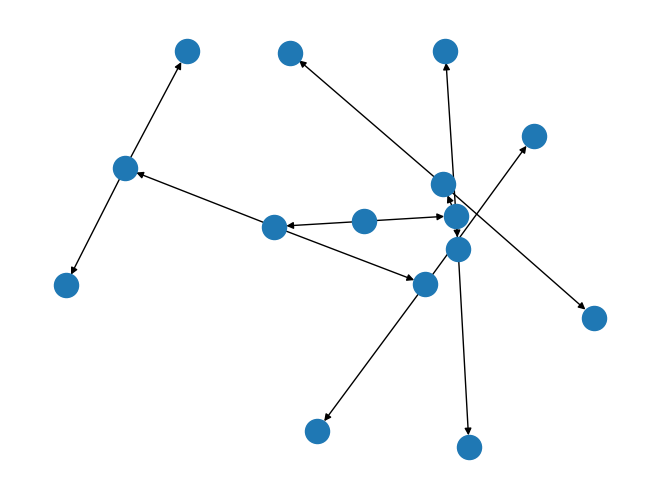

In [20]:
tree = nx.DiGraph()
tree.add_nodes_from(list(range(14)))
tree.add_edges_from([(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6), (3, 7), (3, 8), (4, 9), (4, 10), (5, 11), (5, 12), (6, 13), (6, 14)])
nx.draw(tree)

root = 0

In [21]:
levels = list(nx.bfs_layers(tree, sources=root))[:-1]

In [22]:
def parent(tree, node):
    pred = list(tree.predecessors(node))
    if len(pred):
        return pred[0]
    else:
        return -1

def total_degree(tree, node):
    return len(list(tree.successors(node))) + len(list(tree.predecessors(node)))

In [23]:
pos = {-1 : np.array([0.0, 0.0]), root : np.array([0.0, 0.0])}

for level, nodes in enumerate(levels):
    radius = np.tanh((level + 1) / (2 * np.arcsinh(np.sqrt(2))))
    
    # iterate through all nodes in a level
    for n in nodes:
        # for every node, look at all it's children
        for i, child in enumerate(list(tree.successors(n))):
            # angle = 360 / # of children parent has
            child_angle = (i + 1) * (2*np.pi / total_degree(tree, parent(tree, child)))
                                    
            if (level != 0):
                b = np.linalg.norm(pos[parent(tree, child)])
                a = radius
                
                phi = np.arctan2(pos[parent(tree, child)][1], pos[parent(tree, child)][0])                
                delta = pos[parent(tree, child)] - pos[parent(tree, parent(tree, child))]
                theta = np.arctan2(delta[1], delta[0])
                
                angle = phi + (np.pi - (theta + np.pi - child_angle))
                
                print(phi * 180/np.pi, theta * 180/np.pi, child_angle * 180/np.pi, angle * 180/np.pi)
                                
#                 assert a > b
#                 assert np.cos(child_angle) < 0
                
                c = a*np.cos(angle) + np.sqrt(a**2 * np.cos(angle)**2 - (b**2 - a**2))
                    
#                 x = np.cos(np.pi - child_angle) * c
#                 y = np.sin(np.pi - child_angle) * c
                
                x = c * np.cos(theta + np.pi - child_angle)
                y = c * np.sin(theta + np.pi - child_angle)

                pos[child] = pos[parent(tree, child)] + np.array([x, y])
            else:
                x = radius * np.cos(child_angle)
                y = radius * np.sin(child_angle)
                
                pos[child] = np.array([x, y])

180.0 180.0 119.99999999999999 119.99999999999997
180.0 180.0 239.99999999999997 239.99999999999997
-1.4033418597069754e-14 -1.4033418597069754e-14 119.99999999999999 119.99999999999999
-1.4033418597069754e-14 -1.4033418597069754e-14 239.99999999999997 240.00000000000003
-154.17041841747007 -119.99999999999999 119.99999999999999 85.82958158252993
-154.17041841747007 -119.99999999999999 239.99999999999997 205.82958158252995
154.1704184174701 120.00000000000004 119.99999999999999 154.17041841747002
154.1704184174701 120.00000000000004 239.99999999999997 274.17041841747005
25.829581582529904 59.999999999999986 119.99999999999999 85.82958158252993
25.829581582529904 59.999999999999986 239.99999999999997 205.8295815825299
-25.829581582529936 -60.00000000000001 119.99999999999999 154.17041841747007
-25.829581582529936 -60.00000000000001 239.99999999999997 274.17041841747005


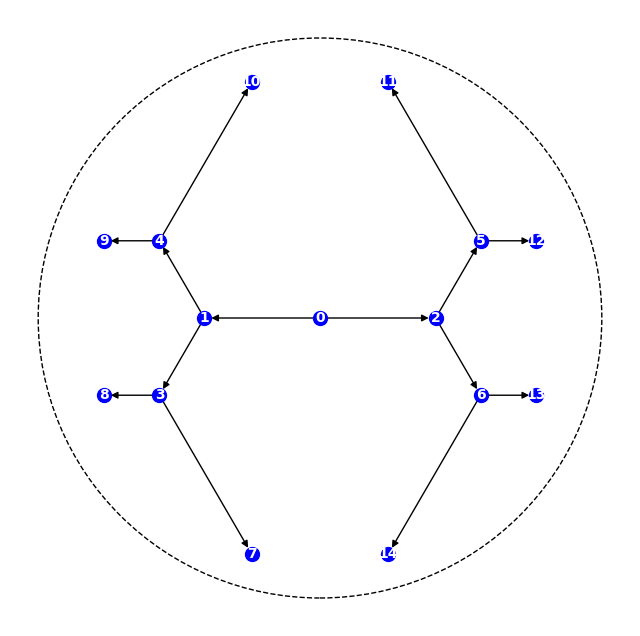

In [24]:
plt.figure(figsize=(8, 8))
ax = plt.gca()
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--')
ax.add_artist(circle)

nx.draw(tree, pos=pos, node_color='blue', with_labels=True, node_size=100, font_size=10, 
        font_color='white', font_weight='bold', ax=ax)
plt.show()

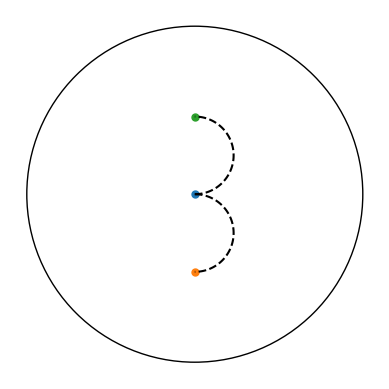

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def poincare_distance(r1, r2):
    return np.arccosh(1 + 2 * (r1 * r2) / ((1 - r1 ** 2) * (1 - r2 ** 2)))

def mobius_addition(x, y):
    return (x + y) / (1 + x * y)

def generate_tree(node, depth, max_depth, r, theta, tree):
    if depth == max_depth:
        return

    tree.append((r, theta, depth))
    left_child_r = mobius_addition(r, np.tanh(1 / (2 * depth + 2)))
    right_child_r = left_child_r

    left_child_theta = theta - np.pi / 2 ** (depth + 1)
    right_child_theta = theta + np.pi / 2 ** (depth + 1)

    generate_tree(2 * node + 1, depth + 1, max_depth, left_child_r, left_child_theta, tree)
    generate_tree(2 * node + 2, depth + 1, max_depth, right_child_r, right_child_theta, tree)

def poincare_tree(max_depth):
    tree = []
    generate_tree(0, 0, max_depth, 0, 0, tree)
    
    return tree

def polar_to_poincare(r, theta):
    return r * np.exp(1j * theta)

def plot_poincare_tree(tree):
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.add_artist(plt.Circle((0, 0), 1, color='black', fill=False))

    for r, theta, depth in tree:
        p = polar_to_poincare(r, theta)
        ax.plot(p.real, p.imag, 'o', markersize=5)
        if depth > 0:
            parent_r, parent_theta, _ = tree[(depth - 1) // 2]
            parent_p = polar_to_poincare(parent_r, parent_theta)

            # Calculate the center and radius of the circle for the geodesic
            circle_radius = np.abs(parent_p - p) / 2
            circle_center = (parent_p + p) / 2
            circle_angle = np.angle(circle_center)

            # Calculate the start and end angles of the arc
            start_angle = np.angle(parent_p - circle_center)
            end_angle = np.angle(p - circle_center)

            # Generate points along the geodesic arc
            arc_angles = np.linspace(start_angle, end_angle, 100)
            arc_points = circle_center + circle_radius * np.exp(1j * arc_angles)

            # Plot the geodesic arc
            ax.plot(arc_points.real, arc_points.imag, linestyle='dashed', color='black')

    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.axis('off')
    plt.show()

tree = poincare_tree(2)
plot_poincare_tree(tree)


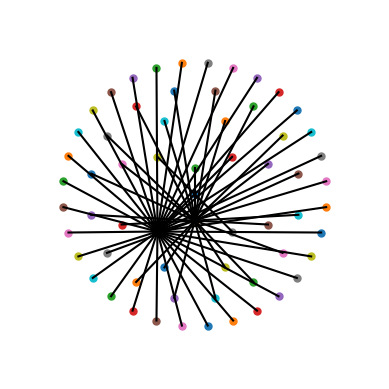

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def generate_tree(node, depth, max_depth, r, theta, tree):
    if depth == max_depth:
        return

    tree.append((r, theta, depth))
    left_child_r = r + 1 / (max_depth + 1)
    right_child_r = left_child_r

    left_child_theta = theta - np.pi / 2 ** (depth + 1)
    right_child_theta = theta + np.pi / 2 ** (depth + 1)

    generate_tree(2 * node + 1, depth + 1, max_depth, left_child_r, left_child_theta, tree)
    generate_tree(2 * node + 2, depth + 1, max_depth, right_child_r, right_child_theta, tree)

def radial_tree(max_depth):
    tree = []
    generate_tree(0, 0, max_depth, 0, 0, tree)
    return tree

def polar_to_cartesian(r, theta):
    return r * np.cos(theta), r * np.sin(theta)

def plot_radial_tree(tree):
    fig, ax = plt.subplots()
    ax.set_aspect('equal')

    for r, theta, depth in tree:
        x, y = polar_to_cartesian(r, theta)
        ax.plot(x, y, 'o', markersize=5)
        if depth > 0:
            parent_r, parent_theta, _ = tree[(depth - 1) // 2]
            parent_x, parent_y = polar_to_cartesian(parent_r, parent_theta)
            ax.plot([parent_x, x], [parent_y, y], linestyle='solid', color='black')

    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.axis('off')
    plt.show()

tree = radial_tree(6)
plot_radial_tree(tree)

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the grayscale image
image = cv2.imread('./mini_imagenet/train/0.jpeg', cv2.IMREAD_GRAYSCALE)

# Compute the 2D Fourier transform
fft_image = np.fft.fft2(image)

# Get the magnitude spectrum
magnitude_spectrum = np.abs(fft_image)

# Select significant Fourier coefficients (e.g., top N coefficients)
N = 100  # Number of significant coefficients to keep
significant_coefficients = np.argsort(magnitude_spectrum.flatten())[-N:]

# Store the selected coefficients as parameters
parameters = fft_image.flatten()[significant_coefficients]

In [2]:
# Reconstruct the image using the stored coefficients
reconstructed_image = np.sum(parameters[:, np.newaxis, np.newaxis] * np.exp(1j * np.fft.ifftshift(significant_coefficients).reshape(-1, 1, 1)), axis=0)

In [ ]:
# Display the reconstructed image
cv2.imshow('Reconstructed Image', np.real(reconstructed_image).astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()